### Page View Time Series Visualizer

### Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

For each chart, make sure to use a copy of the data frame. Unit tests are written for you under `test_module.py`.

### Development

For development, you can use `main.py` to test your functions. Click the "run" button and `main.py` will run.

### Testing 

We imported the tests from `test_module.py` to `main.py` for your convenience. The tests will run automatically whenever you hit the "run" button.

### Submitting

Copy your project's URL and submit it to freeCodeCamp.


In [134]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

#### QUESTION 1
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [135]:
# import data
df = pd.read_csv('C:/Users/Frances-Anthony/Documents/Udacity/Freecodecamp/fcc-forum-pageviews.csv', index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [136]:
df.shape

(1304, 1)

In [137]:
df.isnull().sum()

value    0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [139]:
df.info

<bound method DataFrame.info of              value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]>

#### QUESTION 2
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- In pandas `~=not, |=or, &=and`

In [140]:
df=df.drop(df[(df['value']<df['value'].quantile(0.025)) | (df['value']>df['value'].quantile(0.975))].index)
df.count()

value    1238
dtype: int64

In [141]:
df = df.drop(df[(df['value'] > df['value'].quantile(0.975)) | (df['value'] < df['value'].quantile(0.025))].index)
df.count()

value    1176
dtype: int64

#### QUESTION 3
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views `5/2016-12/2019".` The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

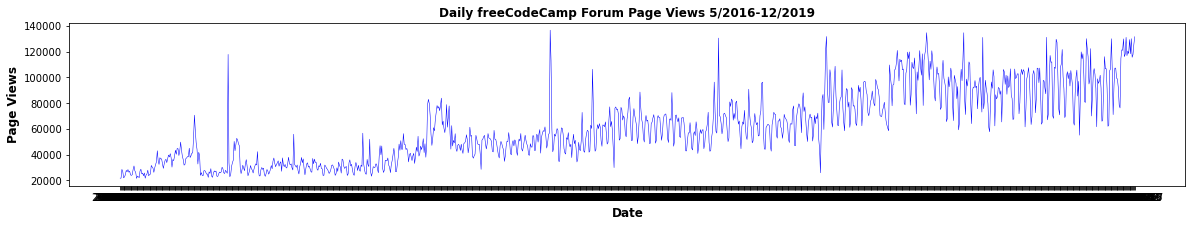

In [142]:
plt.figure(figsize=(20, 3))
plt.plot(df['value'], color='b', linewidth=0.5)
plt.xlabel("Date", fontsize=12, weight='bold')
plt.ylabel("Page Views", fontsize=12, weight='bold')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize=12, weight='bold')
plt.xticks(None);
# save fig
fig.savefig('line_plot.png');

#### QUESTION 4
- Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [143]:
df.head(3)

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508


In [144]:
df.columns

Index(['value'], dtype='object')

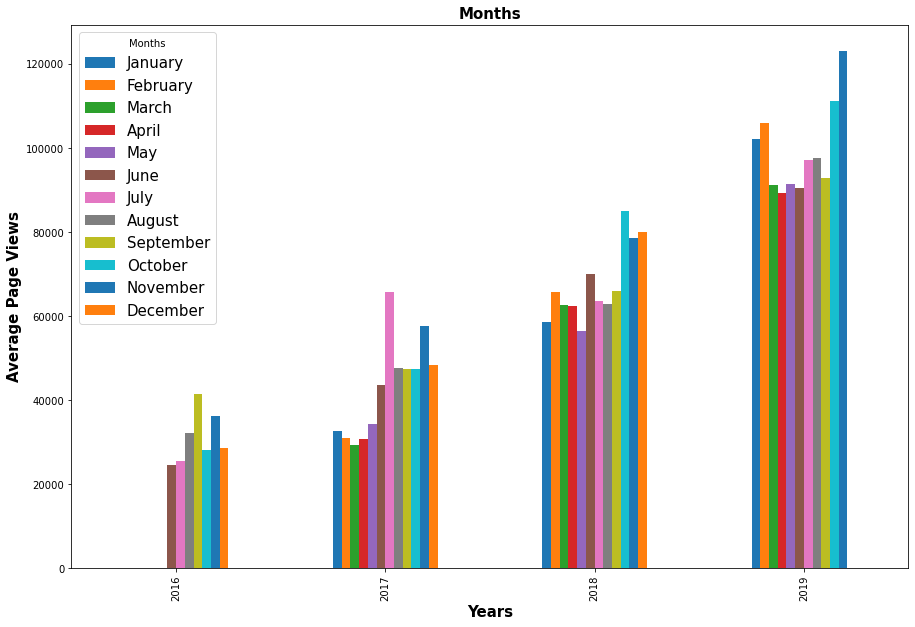

In [145]:
#make a copy of dataframe
df2 = df.copy()

#extract month and year from date
df2['year'] = pd.DatetimeIndex(df2.index).year
df2['month'] =  pd.DatetimeIndex(df2.index).month

#view data
#df2.head()

#group by year and month and calculate mean
df2 = df2.groupby(['year', 'month'])['value'].mean()

#group the months by year
df2 = df2.unstack()

#list months
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

#Draw bar plot
#fig = df2.plot(kind = 'bar', figsize=(15, 10)).figure
df2.plot(kind = 'bar', figsize=(15, 10))

#define plot parameters
plt.xlabel("Years", fontsize=15, weight='bold')
plt.ylabel("Average Page Views", fontsize=15, weight='bold')
plt.title("Months", fontsize=15, weight='bold')
legend = plt.legend(title='Months', fontsize = 15, labels=month_names)
# save image
fig.savefig('bar_plot.png')
#title=legend.get_title()

In [146]:
# another method for question 3: https://stackoverflow.com/questions/53734646/group-dataframe-column-graph-based-on-common-x-axis-values
#group by year and month and calculate mean
#df2.groupby(['year', 'month'])['value'].mean()
#df2.unstack()

#### Question 4

 - Create a draw_box_plot function that uses Searborn to draw two adjacent box plot. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and y axis are labeled correctly.

In [147]:
# make a copy of dataframe
df2 = df.copy()

# set new index, remove date as index
df2.reset_index(inplace=True)

# extract month and year
df2['year']=pd.DatetimeIndex(df2["date"]).year
df2['month']=pd.DatetimeIndex(df2["date"]).month

# convert month to names, e.g. Jan, Feb
import calendar
df2['month'] = df2['month'].apply(lambda x: calendar.month_abbr[x])

# print df
df2.head()

,date,value,year,month
0,2016-06-17,21691,2016,Jun
1,2016-06-18,21681,2016,Jun
2,2016-06-20,28508,2016,Jun
3,2016-06-21,26805,2016,Jun
4,2016-06-25,21923,2016,Jun


In [148]:
df2['month'].unique()

array(['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb',
       'Mar', 'Apr', 'May'], dtype=object)

Text(0.5, 0, 'Months')

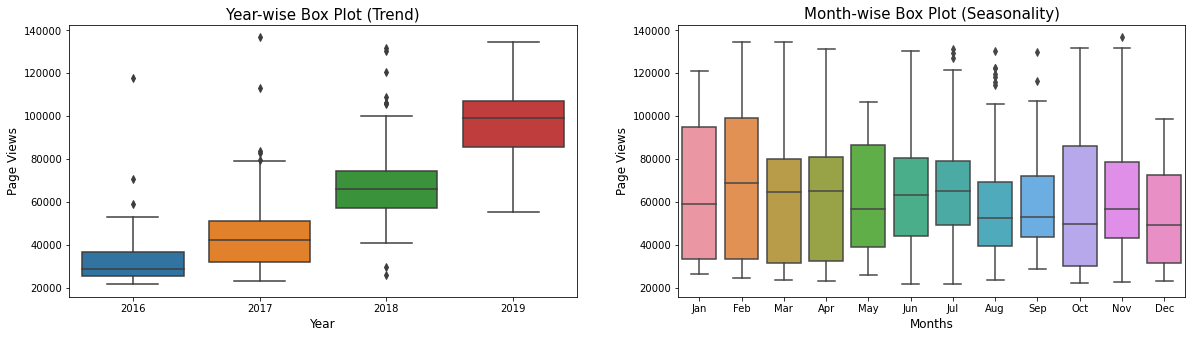

In [149]:
#draw two adjacent boxplot using seaborne
#show value distributed within a given year and month, comparing over time

#define plot parameters
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()

#list months
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
             'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plot one: left box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df2)
plt.title("Year-wise Box Plot (Trend)", fontsize=15)
plt.ylabel("Page Views", size=12)
plt.xlabel("Year", size=12);

#plot two: right boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df2, order=month_names)
plt.title("Month-wise Box Plot (Seasonality)", fontsize=15)
plt.ylabel("Page Views", size=12)
plt.xlabel("Months", size=12)

# Save image and return fig (don't change this part)
fig.savefig('box_plot.png');